In [1]:
import sys
path ="/home/sergio/github/shaolin-master"
sys.path.append(path)

In order to use the shaolin framework more comfortably we will use a little screen hack.

In [2]:
%%HTML
<style>
.container { width:100% !important; }
.input{ width:60% !important;
       align: center;
      }
.text_cell{ width:70% !important;
            font-size: 16px;}
.title {align:center !important;}
</style>

# Shaolin Dashboard Introduction

<a id='index'></a>

## Index 

- [1 Introduction](#intro)
- [2 Structure](#structure)
   - [2.1 Attributes](#attributes)
   - [2.2 Functions](#functions)
   
- [3 Syntax](#syntax)
   - [3.1 Examples](#syntax_examples)

- [4 Interactivity](#interactivity)
   - [4.1 Default values](#interactivity_default)
   - [4.2 Syntax](#interactivity_syntax)
- [5 Styling](#styling)  
    - [5.1 State manager](#state_manager)
    - [5.2 Accessing, loading and changing the layout](#load_and_save)

<a id='introduction'></a>

# 1 Introduction

[Back to top](#index)

The Dashboard is the main tool of the Shaolin frameowrk. It can be seen as an interactive code box and it has all the functionalities needed for controlling the interactivity of its components.

A Dashboard can be build combining widgets and other dashboards. It can be used as a standalone object or in combination with other Dashboards, and its main goal is to offer a simplified interface for managing all the ipywidets functionality in a simpler and scalable way.

<a id='structure'></a>

# 2 Structure

This is a description of the Dashboard capabilities. A detailed explanation can be seen in further sections.

<a id='attributes'></a>

## 2.1 Attributes

[Back to top](#index)

Here we will describe the attributes of a Dashboard. They are all related to managing interactivity and the same functionality offered by the ipywidgets package:

- Init parameters:
    - **dasboard**: list representing the syntax of the Dasboard components.
    - **func**(None): function to mimic the interactive behaviour of the ipywidgets package. It will interact with the widgets defined in the dashboard.
    - **data**(None): The data the Dashboard will use.
    - **name**(None): Name of the Dasboard. Each component of a Dashboard must have a unique name. 
    - **mode**('active'): interactivity mode of the Dashboard.

    - **visible**(True): Displays all the dashboard's components when True and hides its components when False.
    - **state**(None): dict containing all the layout parameters of the dashboard components. (soon it will contain the vaue information also)
- Parameters created at instantiation:
    - **widget**: Graphic interface of the Dashboard.
    - **mode_dict**: dict containing the information regarding the interactivity of every component.
    - **value**, **kwargs**: dictionary of kwargs containing all the interactive and active components as a key-value pairs.
    - **interactive_kwargs**: dict containing the name and value of the interactive components stored as key-value pairs.
    - **state_manager**: Dashboard for customizing, loading and saving the state of the Dashboard.
    - **output**(kwargs): When working with data this attribute contains the processed value that the Dashboard will output. If there is no data it's just an alias for kwargs.


<a id='functions'></a>

## 2.2 Functions 

[Back to top](#index)

A Dashboard has its own functions for mimicking the ipywidgets functionality:

- **name_from_shaoscript**: Returns the name of a shaoscript string notation element.
- **read_shaolist**: reads a Dashboard component from its list representation and returns its shaoscript description, its kwargs and its children.
- **observe**: Same functionality as ipywidgets. It will trigger the observer function when any interactive component changes its value.

- **link**: Links the values of two components.
- **dlink**: Stablishes a direct link between two components.
- **unlink**: Removes a link.
- **interact**: Applies the dashboard func to the Dashboard's output.
- **apply_state**: Sets the state dict of a widget and updates its layout accordingly.

<a id='syntax'></a>

# 3 Syntax

[Back to top](#index)

We will use a custom notation for defining tha layout of the dashboard components. Each component defined in the layout will be accessible as an attribute with the same name as the widget (we can set it directly as a parameter or indirectly with the description as seen early).

A dashboard component will be a list contaning a shaoscript string notation. If the widget can have child the component will be stated as a list of two elements: The first one will be a string containing the widget shaoscript notation and the second one will be a list containing its children elements, where every element will be an item of that list.

This allows for stacking widgets and creating complex boxes more easily than using multiple ipywidgets boxes.

<a id='syntax_examples'></a>

## 3.1 Examples

[Back to top](#index)

In [3]:
from shaolin.core.dashboard import Dashboard

- **Dashboard containing a single widget.**

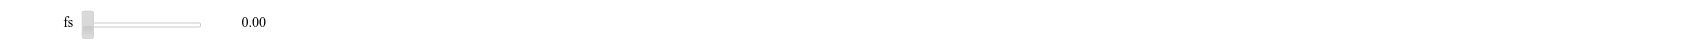

In [4]:
dash = Dashboard(['fs$D=fs'])
dash.widget

- **Dashboard containing three components in a row**

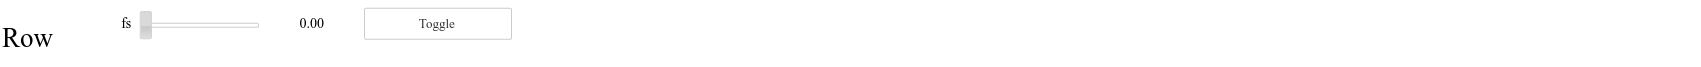

In [5]:
dash = Dashboard(['r$N=row',['##Row$N=text','fs$D=fs','tog$d=Toggle']])
dash.widget

- **A column with two rows of components**

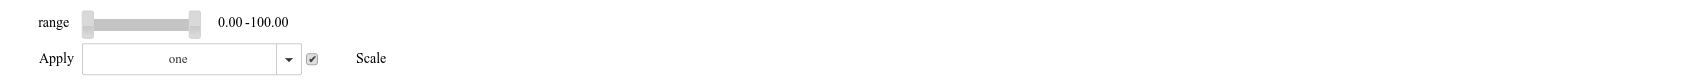

In [6]:
       #Column that gives a name to the Dashboard. 
test_dash = ['c$N=array_scaler',
        #first row only has one widget. This element can be just a string 
        ['@(0,100,1, (0., 100.))$N=scale_slider&d=range',
         #Two widgets in the second row. As this element has childrens it has to be a list.
         ['r$N=main_row',['@dd$d=Apply&N=dd_sel&val=one&o=["one","two","three"]','@True$N=scale_chk&d=Scale']]
        ]
       ]
dboard = Dashboard(test_dash)
dboard.widget

<a id='interactivity'></a>

# 4 Interactivity

[Back to top](#index)

There are 3 modes of interactivity that determines how a given component behaves when its value changes. The mode attribute of a Dashboard holds one interactivity value of the following:

- **Passive**: changing the value of the widget won+t have any additional effect. Markdown and display components are a good example of widgets that can exibit a passive behaviour.

- **active**: If a component is active it will be included in the kwargs dict but changing its value won't trigger the update function.

- **Interactive**: Once the observe function is called on a Dashboard, the target function will be applied each time an interactive component changes its value.

Accessing the mode_dict attribube of a Dashboard the mode of every component can be viewed and changed.

<a id='default_int'></a>

In [7]:
dboard.mode_dict

{'active': [],
 'all': ['array_scaler', 'scale_slider', 'main_row', 'dd_sel', 'scale_chk'],
 'interactive': ['scale_slider', 'dd_sel', 'scale_chk'],
 'passive': ['array_scaler', 'main_row']}

<a id='interactivity_default'></a>

## 4.1 Default values

Each widget and Dashboard will be assignes by default the active mode. An exception to this rule are the widget boxes and Markdown Widgets.

<a id='interactivity_syntax'></a>

## 4.2 Syntax

[Back to top](#index)

The interactivity value can be set writing the character @ at the begining of a shaoscript string. Note that this is a shaoscript syntax feature and will also set the mode as interactive when a widget is created using the function shaoscript (not only with the Dashboard object)

In [8]:
A = Dashboard(['@dd$d=Dropdown&N=dd_sel&val=one&o=["one","two","three"]'])
B = Dashboard(['dd$d=Dropdown&N=dd_sel&val=one&o=["one","two","three"]'],mode='interactive')
print("Interactive dropdown",A.mode_dict,"\n Active dropdown",B.mode_dict)


Interactive dropdown {'all': ['dd_sel'], 'active': [], 'passive': [], 'interactive': ['dd_sel']} 
 Active dropdown {'all': ['dd_sel'], 'active': ['dd_sel'], 'passive': [], 'interactive': []}


In [9]:
A.mode, B.mode

('active', 'interactive')

<a id='styling'></a>

# 5 Styling

[Back to top](#index)

Although it is possible to style a Dashboard accessing the layout attribute of the widgets of any component (the target widget and the box widget wrapping the target) the recommended way of styling a Dashboard is using its state_manager attribute.

The state_manager is a widget that allows to modify, load, and save any change to the Dashboard styling in an interactive way.

<a id='state_manager'></a>

## 5.1 State Manager

[Back to top](#index)

The state manager is a Dashboard that allows to modify in an interactive way any visual property of a given Dashboard. Following the former example we will show how to customize a the Dashboard that we created before.

This is a relatively complex Dashboard which can be seen as a colum that has three different rows:

- ### **Css modifier**: 
This part is in charge of seting a group of css attributes for a selected widget. There are two groupc of css attributes:
    - **Text attribute**: Its widge will display the available values in a dropdown or a text input for non-common values. A custom value can be set by deactivating the Default checkbox for a given attribute. Each selection can either be applied to the target widget of a component or to its box.
    - **Numeric attribute**: Its Dashboard will allow to select the units in which the value will be expressed using a text input or a slider for selecting the numeric value and a togglebutton for selecting the units. 
- ### **Control Panel**: 
This row has the following elements:
    - **Component selector**: This allows to select the component that will be modified.
    - **Layout attribute selector**: This toggle buttons allow to select which layout attribute will be modified:
        - **Grid**: Attributes regarding alignment, padding and margin. The alignment attributes will be applied only to the target or the box of a component only when they will haev a meaningful effect.
        - **W&H**: width and height css related attributes.
        - **Other**: The rest of the layout attributes.
        - **Widget**: Component target's attributes that influence the widget appearance.
    - **Selected attribute display**
    - **Layout saver**
- ### **Target Dashboard**: 
The Dashboard that is currently modifying the state manager. 

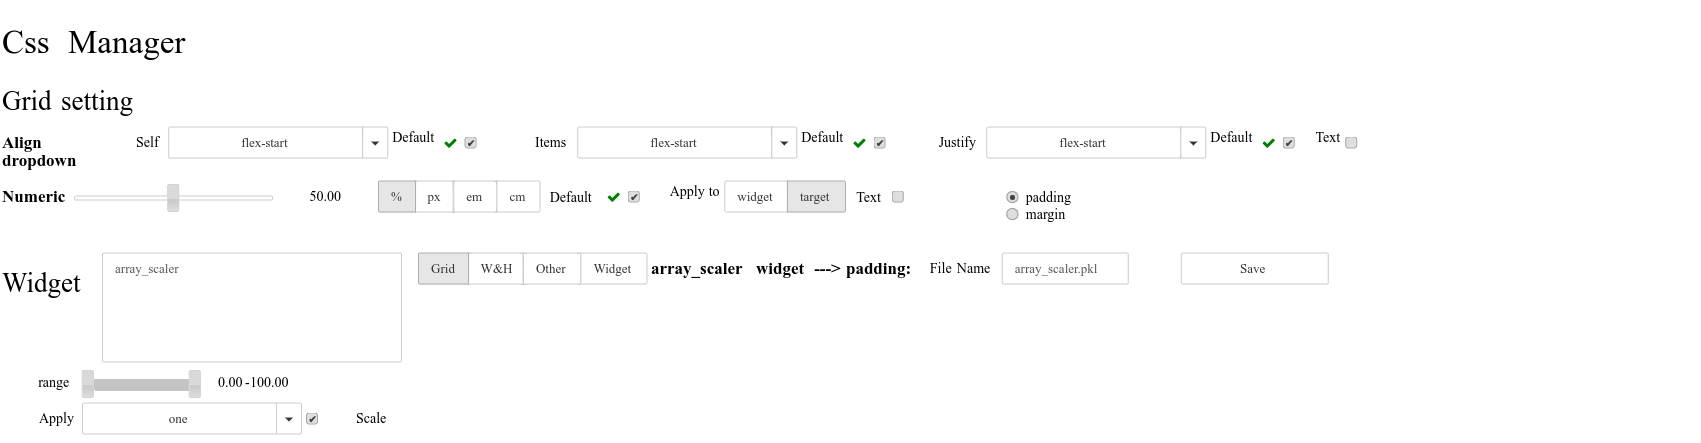

In [10]:
dboard.state_manager

In this example we are going to modify the following:

- **Padding of every component**: 0.5em, dropdown and checkbox 0.25em.
- **Justify value of the checkbox**: center
- **width of the dropdown**: 100%
- **width of the Dashboard**: 22em
- **border of the whole Dashboard**: blue solid 0.1em

<a id='load_and_save'></a>

## 5.2 Accessing, loading and changing the layout

[Back to top](#index)

The modified layout can be read and changed accesing the *state* attribute of a dashboard, and can be saved as a dict by clicking the save button in the state manager. This way the state dict will be saved as a pickle file. 

The folowing example illustrates this process. Note that the A widget behaves on its own and the B and C are linked. This is due to both having the same name (the name of the first element of the Dashboard)

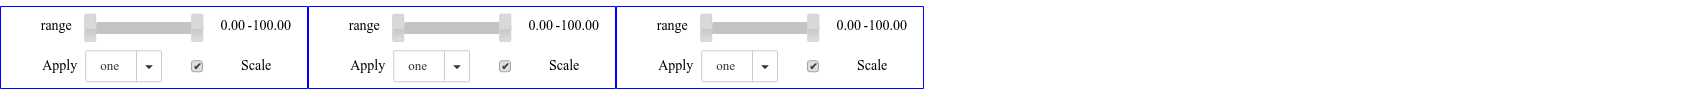

In [11]:
A= Dashboard(test_dash,state='array_scaler.pkl',name='A') #instantiating with the path of a saved layout.
custom_layout = dict(A.state)
B = Dashboard(test_dash,state=custom_layout) #instantiating with a dict 
C = Dashboard(test_dash)#Init with default layout.
C.state = custom_layout #dinamically changing the layout
Dashboard(['r$N=row',[A,B,C]]).widget #This is the new widgets.Hbox(children=[A.widget, B.widget, C.widget])

In [18]:
C.state

{'array_scaler': {'css_traits': {'align_content': {'target': 'blue solid 0.1em',
    'widget': ''},
   'align_items': {'target': 'blue solid 0.1em', 'widget': ''},
   'align_self': {'target': 'blue solid 0.1em', 'widget': ''},
   'border': {'target': 'blue solid 0.1em', 'widget': ''},
   'bottom': {'target': 'blue solid 0.1em', 'widget': ''},
   'display': {'target': 'blue solid 0.1em', 'widget': ''},
   'flex': {'target': 'blue solid 0.1em', 'widget': ''},
   'flex_flow': {'target': 'blue solid 0.1em', 'widget': ''},
   'height': {'target': '', 'widget': ''},
   'justify_content': {'target': 'blue solid 0.1em', 'widget': ''},
   'left': {'target': 'blue solid 0.1em', 'widget': ''},
   'margin': {'target': 'blue solid 0.1em', 'widget': ''},
   'max_height': {'target': '', 'widget': ''},
   'max_width': {'target': '', 'widget': ''},
   'min_height': {'target': '', 'widget': ''},
   'min_width': {'target': '', 'widget': ''},
   'overflow': {'target': 'blue solid 0.1em', 'widget': ''},
  